In [42]:
%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import joypy

In [8]:
#Load data
# clusters looks like {cluster_id:[123,456,...]} where 123 and 456 are proj ids in that cluster
pickle_in = open("./results/motifs_by_cluster.pickle","rb")
motifs_by_cluster = pickle.load(pickle_in)

pickle_in = open("./results/clusters.pickle","rb")
clusters = pickle.load(pickle_in)

# Load Data
comm_auth_by_proj = pd.read_csv('data/author_commits_by_proj.csv').set_index('p_id')
pr_cr_by_proj = pd.read_csv('data/pr_cr_by_proj.csv').set_index('p_id')
issues_by_proj = pd.read_csv('data/issues_by_proj.csv').set_index('p_id')

project = pd.concat([comm_auth_by_proj,pr_cr_by_proj,issues_by_proj],axis=1)

In [36]:
cluster_lookup = {}
for cluster,value in clusters.items():
    for proj in value:
        cluster_lookup[proj] = cluster

project['cluster'] = project.reset_index().p_id.apply(lambda x: cluster_lookup[x]).values

## tsne Graph

## Author by Cluster

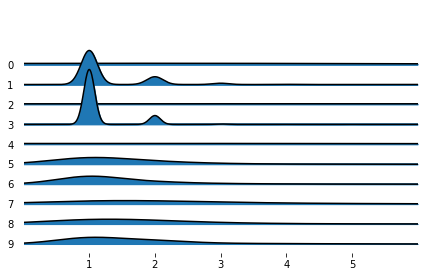

In [81]:
authors_pivot = project.pivot(columns='cluster', values='authors')
_=joypy.joyplot(authors_pivot,x_range=[0,6])

## Commits by Cluster

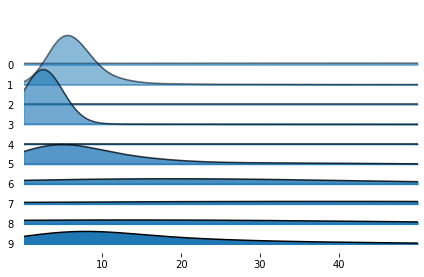

In [74]:
commits_pivot = project.pivot(columns='cluster', values='commits')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,50])

## Issues by Cluster

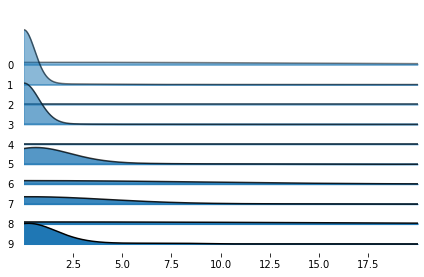

In [76]:
commits_pivot = project.pivot(columns='cluster', values='issues')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,20])

## Pull Requests by Cluster

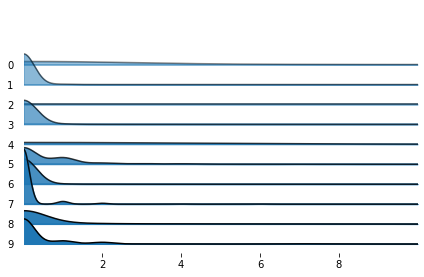

In [78]:
commits_pivot = project.pivot(columns='cluster', values='prs')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,10])

## Code Reviews by Cluster

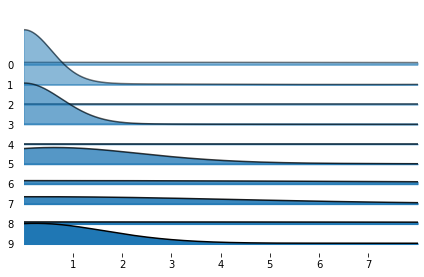

In [80]:
commits_pivot = project.pivot(columns='cluster', values='issues')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,8])